
Training without Experience Replay
Training on Task 1
Training on Task 2
Training on Task 3
Training on Task 4
Training on Task 5


/home/jw7630/repos/LVEBM4CL/.venv/lib/python3.10/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '



Training with Experience Replay
Training on Task 1
Training on Task 2
Training on Task 3
Training on Task 4
Training on Task 5


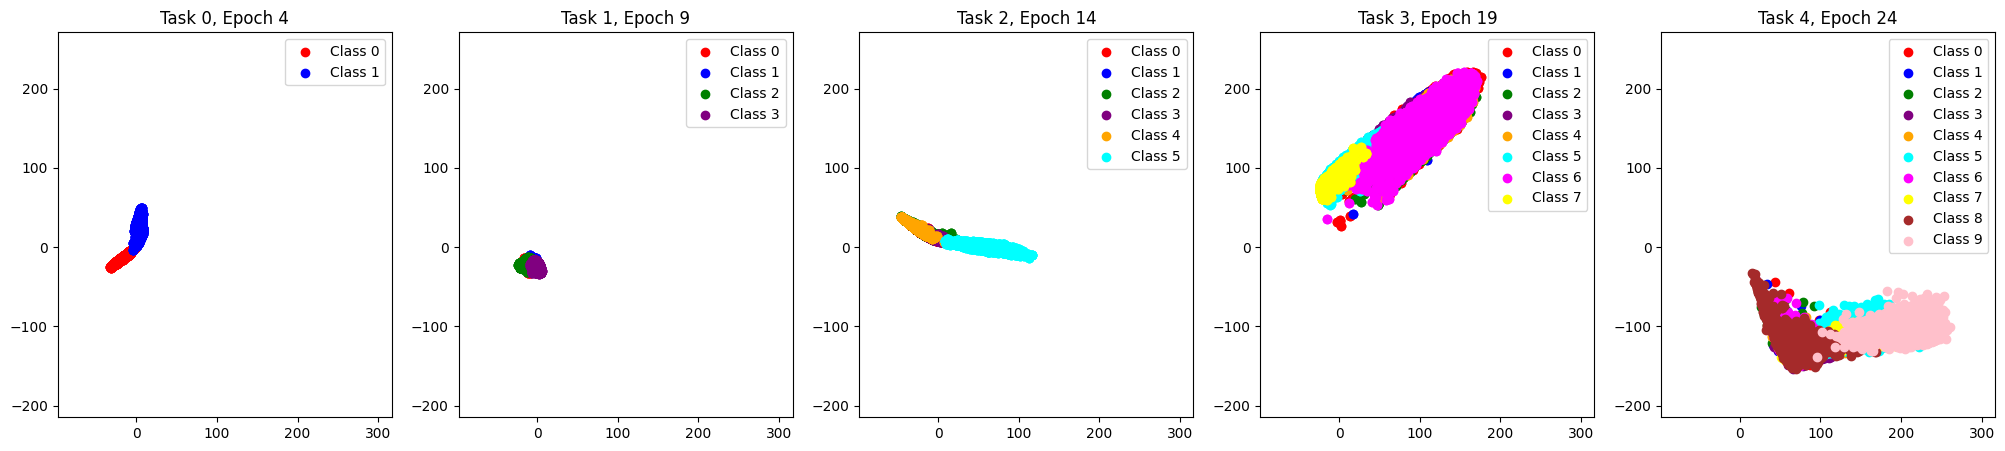

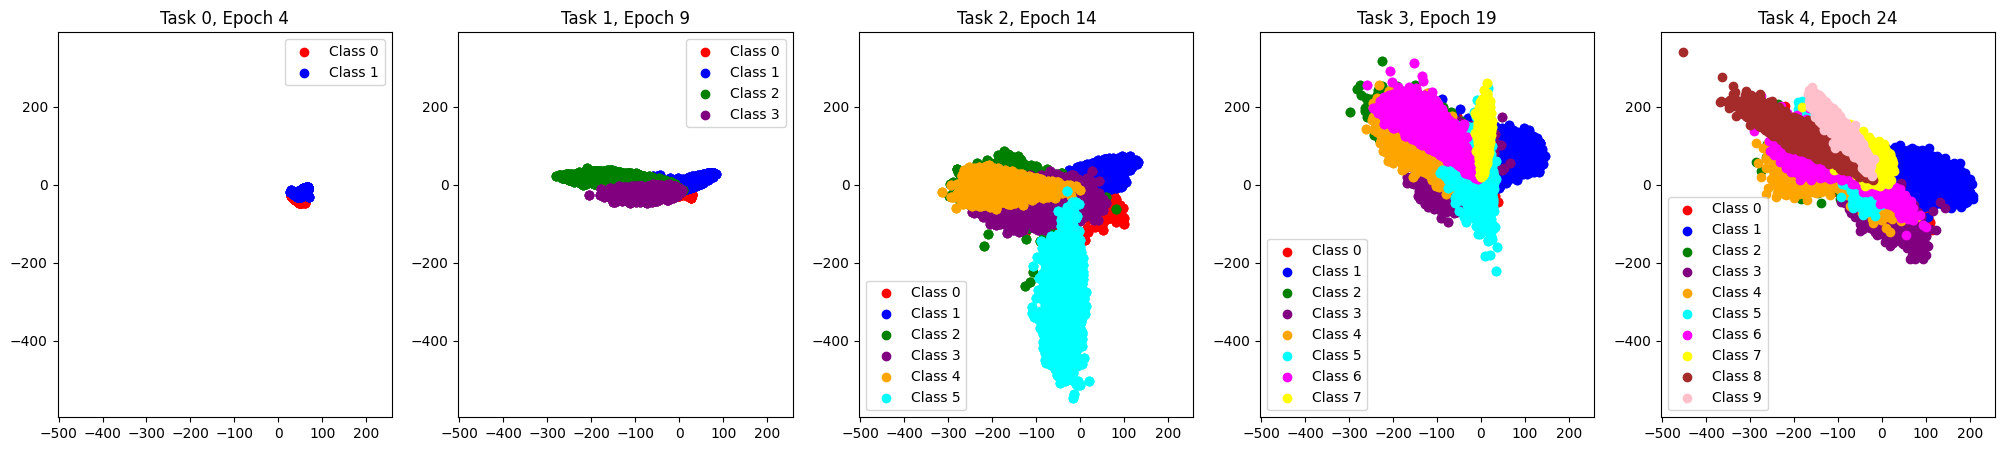

In [2]:
import torch.optim as optim
from torchvision import datasets, transforms

from utils import *

# Load Data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist_train = datasets.FashionMNIST(root="./data", train=True, transform=transform, download=True)
mnist_test = datasets.FashionMNIST(root="./data", train=False, transform=transform, download=True)

# Split dataset into 5 tasks with 2 classes each
tasks = split_mnist_by_classes(mnist_train)
tasks_test = split_mnist_by_classes(mnist_train)


# Create data loaders for each task
batch_size = 64
data_loaders = [DataLoader(task, batch_size=batch_size, shuffle=True) for task in tasks]
criterion = nn.CrossEntropyLoss()

# Train without experience replay
model = SimpleCNN()
optimizer = optim.Adam(model.parameters(), lr=0.001)
print("\nTraining without Experience Replay")
train_model(model, data_loaders, tasks_test, optimizer, criterion, path="FMNIST_vanilla")

# Train with experience replay
replay_model = SimpleCNN()
replay_optimizer = optim.Adam(replay_model.parameters(), lr=0.001)
replay_buffer = ReplayBufferReservoir(capacity=100)
print("\nTraining with Experience Replay")
train_model(replay_model, data_loaders, tasks_test, replay_optimizer, criterion, replay_buffer=replay_buffer, path="FMNIST_expireince_replay")